# Mini Project 2
## Kyle Kulas

### Step 1: get data
Use the following APIs to get restaurants, bars, and various POI's in the Squamish area:

In [190]:
import requests as re
import os
import config as cfg
import json
from IPython.display import JSON
import numpy as np
import pandas as pd
from PIL import Image

## Get Foursquare response

### Working

In [191]:
# Foursquare category ids:
categories = {'Nightlife Spot': '4d4b7105d754a06376d81259',
             'Food': '4d4b7105d754a06374d81259' }

payload = {'client_id': cfg.FOURSQUARE_CLIENT_ID, 
           'client_secret': cfg.FOURSQUARE_CLIENT_SECRET, 
           'v': "20200731", 
           'near': "Squamish,Canada",
           'categoryId': list(categories.values()),
           'limit': "100"}

response = re.get("https://api.foursquare.com/v2/venues/search", params = payload)
print(response.status_code)
data = json.loads(response.text)

200


### Test

In [ ]:
def get_4square_response():
    categories = {'Nightlife Spot': '4d4b7105d754a06376d81259',
                 'Food': '4d4b7105d754a06374d81259' }

    payload = {'client_id': cfg.FOURSQUARE_CLIENT_ID, 
               'client_secret': cfg.FOURSQUARE_CLIENT_SECRET, 
               'v': "20200731", 
               'near': "Squamish,Canada",
               'categoryId': list(categories.values()),
               'limit': "100"}

    response = re.get("https://api.foursquare.com/v2/venues/search", params = payload)
    print(response.status_code)
    data = json.loads(response.text)
    
    
    

In [192]:
# save response to file
with open('squam_res_and_bar_data.json', 'w') as outfile:
    json.dump(data, outfile)

In [83]:
JSON(data)

<IPython.core.display.JSON object>

In [193]:
# Opening JSON file
f = open('squam_res_and_bar_data.json', 'r')
data = json.load(f)

# Setup empty dic to store venue details
venues = {'id':[],
         'name': [],
         'rating': []}

# for each venue, store name and id values
for venue in data['response']['venues']:
    venues['id'].append(venue['id'])
    venues['name'].append(venue['name'])

venues

{'id': ['5da275378a8ebb00083003e1',
  '5983eaef0d8a0f59001faa5f',
  '58c59a97730a927535161615',
  '4bb6570f6edc76b02ac8301c',
  '4bda50ce3904a593d926469e',
  '58f13810f62f2b6d3ee3cee3',
  '4b639897f964a520c1852ae3',
  '4bf828da5317a593c44fff7e',
  '4ef5eb51775b54cdb33548c4',
  '4cf0c73f1d18a1432dec4eec',
  '51aa9f1e498ed257d71dd83e',
  '5930e500acb00b7de813afbb',
  '4b09eb3bf964a520c21f23e3',
  '52054fc811d2aadc55ee5269',
  '5b80d15c25ecca002c89b008',
  '5cf1f2f7c03635002c0ab353',
  '5c20593e464d65002c9ff587',
  '603078e7e7ce9d173ded771b',
  '4c0df7e7d64c0f477b7c275d',
  '5c43be65898bdc002c9183eb',
  '4c8c7d52c37a6dcbf019f87a',
  '4bad71daf964a52094513be3',
  '4e46beb2887781a619aeda87',
  '4ade50f2f964a520ef7421e3',
  '5172524d498edd74d22a36c7',
  '4eefec556c256000c6543d18',
  '57830d3e498e62d44a2d1a91',
  '52b27e08498ea7fb3801a761'],
 'name': ['The Goat',
  'Knotty Burl',
  'A-Frame Brewing',
  'Crazy Raven Bar & Grill',
  'Shady Tree',
  'Backcountry Brewing',
  'Boston Pizza',
  'th

In [194]:
# get venue details and store in list called all_details
all_details = []
def get_venue_rating(venue_id):
    payload = {'client_id': cfg.FOURSQUARE_CLIENT_ID, 
               'client_secret': cfg.FOURSQUARE_CLIENT_SECRET, 
               'v': "20200731"}
    response = re.get(f"https://api.foursquare.com/v2/venues/{venue_id}", params = payload)

    venue_details = json.loads(response.text)

    return venue_details

for i, venue_id in enumerate(venues['id']):
    try:
        all_details.append(get_venue_rating(venues['id'][i]))
        print(i)
    except KeyError as e:
        print(e)
    
all_details

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


[{'meta': {'code': 200, 'requestId': '61855f8ec6da7673c66a9208'},
  'response': {'venue': {'id': '5da275378a8ebb00083003e1',
    'name': 'The Goat',
    'contact': {},
    'location': {'address': '38005 Cleveland Ave',
     'crossStreet': 'Victoria St.',
     'lat': 49.698581,
     'lng': -123.154089,
     'labeledLatLngs': [{'label': 'display',
       'lat': 49.698581,
       'lng': -123.154089}],
     'postalCode': 'V8B 0C3',
     'cc': 'CA',
     'city': 'Squamish',
     'state': 'BC',
     'country': 'Canada',
     'formattedAddress': ['38005 Cleveland Ave (Victoria St.)',
      'Squamish BC V8B 0C3',
      'Canada']},
    'canonicalUrl': 'https://foursquare.com/v/the-goat/5da275378a8ebb00083003e1',
    'categories': [{'id': '4bf58dd8d48988d116941735',
      'name': 'Bar',
      'pluralName': 'Bars',
      'shortName': 'Bar',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
       'suffix': '.png'},
      'primary': True}],
    'verified': False,
  

In [195]:
# get venue details and store in list called all_details
all_details = []
def get_venue_rating(venue_id):
    payload = {'client_id': cfg.FOURSQUARE_CLIENT_ID, 
               'client_secret': cfg.FOURSQUARE_CLIENT_SECRET, 
               'v': "20200731"}
    response = re.get(f"https://api.foursquare.com/v2/venues/{venue_id}", params = payload)

    venue_details = json.loads(response.text)

    return venue_details

for i, venue_id in enumerate(venues['id']):
    try:
        all_details.append(get_venue_rating(venues['id'][i])['response'])
        print(i)
    except KeyError as e:
        print(e)
    
#all_details

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [47]:
# save response to file
with open('all_details_data.json', 'w') as outfile:
    json.dump(all_details, outfile)

In [205]:
# Opening JSON file
f = open('all_details_data.json', 'r')
all_details = json.load(f)
fq_df = pd.json_normalize(all_details)


#fq_df.to_excel('fq_dataframe.xlsx', sheet_name='details', engine='openpyxl')

filtered_fq_df = fq_df[['venue.name','venue.rating','venue.location.lat','venue.location.lng']]
top_ten_fs = filtered_fq_df[['venue.name','venue.rating']].sort_values('venue.rating', ascending=False)
top_ten_fs['venue.rating_norm'] = top_ten_fs['venue.rating'] / 2
top_ten_fs[['venue.name','venue.rating_norm']].head(10)

,venue.name,venue.rating_norm
7,Backcountry Brewing,4.50
24,Howe Sound Inn and Brewing Company,4.15
5,Crazy Raven Bar & Grill,3.75
3,A-Frame Brewing,3.65
6,Shady Tree,3.45
23,Boston Pizza,3.25
4,Match Eatery & Public House,3.10
1,Boston Pizza,3.05
0,The Goat,NaN
2,Knotty Burl,NaN


In [189]:
# Opening JSON file
f = open('all_details_data.json', 'r')
all_details = json.load(f)

# for each venue details response, get rating and append to venues['rating']
for details_response in enumerate(all_details):
    try:
        venues['rating'].append(details_response[1]['response']['venue']['rating'])
    except KeyError:
        
        venues['rating'].append(np.NAN)

NameError: name 'venues' is not defined

In [186]:
venues

NameError: name 'venues' is not defined

In [185]:
ven_df = pd.DataFrame(venues)
ven_df.sort_values('rating')[['name','rating']]

NameError: name 'venues' is not defined

#### Yelp

In [19]:
# Foursquare category ids:
categories = 'food,nightlife'

payload = {'location': "Squamish,Canada",
           'categories': categories,
           'limit': "50"}

headers_dict = {'Authorization': f'Bearer {cfg.YELP_API_KEY}'}

response = re.get("https://api.yelp.com/v3/businesses/search", params = payload, headers=headers_dict)
print(response.status_code)
data = json.loads(response.text)

200


In [20]:
# save response to file
with open('yelp_squam_res_and_bar_data.json', 'w') as outfile:
    json.dump(data, outfile)

In [21]:
JSON(data)

<IPython.core.display.JSON object>

In [176]:
# Opening JSON file
f = open('yelp_squam_res_and_bar_data.json', 'r')
data = json.load(f)

yelp_df = pd.json_normalize(data['businesses'])
filtered_yelp_df= yelp_df[['name','rating','coordinates.latitude','coordinates.longitude']]
top_ten_yelp = filtered_yelp_df.sort_values('rating', ascending=False).reset_index(drop=True).head(11)
top_ten_yelp['coordinates.latitude'] = top_ten_yelp['coordinates.latitude'].round(decimals=5)
top_ten_yelp['coordinates.longitude'] = top_ten_yelp['coordinates.longitude'].round(decimals=5)


top_ten_yelp['lat_lon'] = top_ten_yelp['coordinates.latitude'].apply(str) + ',' + top_ten_yelp['coordinates.longitude'].apply(str)
top_ten_yelp = top_ten_yelp.drop(1, axis=0)# drop 'base cafe' because location is wrong
top_ten_yelp

,name,rating,coordinates.latitude,coordinates.longitude,lat_lon
0,Lucas Teas,5.0,49.69873,-123.15286,"49.69873,-123.15286"
2,Narwhals Ice Cream,5.0,49.69854,-123.15505,"49.69854,-123.15505"
3,Xoco Chocolate,5.0,49.69868,-123.15291,"49.69868,-123.15291"
4,Counterpart Coffee,5.0,49.71948,-123.14977,"49.71948,-123.14977"
5,Save-On-Foods,4.5,49.70324,-123.15173,"49.70324,-123.15173"
6,Tall Tree Bakery,4.5,49.72399,-123.15416,"49.72399,-123.15416"
7,Geo Cider,4.5,49.72425,-123.15430,"49.72425,-123.1543"
8,Backyard,4.5,49.70198,-123.13297,"49.70198,-123.13297"
9,Golden Crust,4.5,49.71640,-123.15618,"49.7164,-123.15618"
10,Caffe Garibaldi,4.5,49.70738,-123.14587,"49.70738,-123.14587"


In [177]:
# get distance betwen each set of points

distance_map = [[0 for i in range(10)] for j in range(10)]
time_map = [[0 for i in range(10)] for j in range(10)]
direction_poly = [[0 for i in range(10)] for j in range(10)]

#get distance between points
for o_index, origin  in enumerate(top_ten_yelp['lat_lon']):    
    for d_index, destination in enumerate(top_ten_yelp['lat_lon']):   
        payload = {'destination': destination, 
                   'origin':origin,
                  'key': cfg.GOOGLE_API_KEY}
        
        dist_response = re.get("https://maps.googleapis.com/maps/api/directions/json", params = payload)
        dist_data = json.loads(dist_response.text)
        
        
        """
        if count <2:
            with open('direction_response.json', 'w') as outfile:
                json.dump(dist_data, outfile)
            count += 1
        """
        
        distance_map[o_index][d_index] =  dist_data['routes'][0]['legs'][0]['distance']['value']
        time_map[o_index][d_index] = dist_data['routes'][0]['legs'][0]['duration']['value']
        direction_poly[o_index][d_index] = dist_data['routes'][0]['overview_polyline']['points']
        
        
print(distance_map)
print(time_map)
print(direction_poly)

[[0, 198, 7, 2986, 630, 3166, 3195, 3243, 2301, 1290], [198, 0, 191, 3143, 567, 3323, 3352, 3399, 2458, 1446], [7, 191, 0, 2993, 637, 3173, 3202, 3249, 2308, 1296], [2699, 2856, 2706, 0, 2460, 828, 857, 4242, 685, 2118], [706, 567, 713, 2771, 0, 2951, 2980, 3027, 2086, 1074], [3143, 3300, 3150, 776, 2904, 0, 29, 5060, 865, 2936], [3172, 3329, 3179, 805, 2933, 29, 0, 5089, 894, 2965], [3257, 3414, 3264, 4227, 3018, 5031, 5060, 0, 4640, 2751], [2278, 2435, 2285, 685, 2039, 865, 894, 4655, 0, 2396], [1327, 1484, 1334, 2100, 1088, 2886, 2915, 2856, 2513, 0]]
[[0, 87, 1, 326, 163, 324, 327, 402, 260, 245], [56, 0, 54, 361, 136, 359, 362, 437, 295, 280], [1, 86, 0, 327, 165, 325, 328, 403, 261, 246], [298, 325, 299, 0, 253, 112, 115, 398, 78, 289], [150, 145, 151, 313, 0, 311, 314, 390, 247, 233], [315, 341, 316, 88, 269, 0, 2, 453, 66, 344], [317, 343, 318, 90, 271, 2, 0, 455, 69, 346], [410, 436, 411, 396, 364, 445, 448, 0, 436, 294], [249, 275, 250, 66, 203, 64, 66, 422, 0, 286], [273, 30

### TSP using ortools

#### Using distance as distance map

In [26]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = distance_map  # yapf: disable
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data

def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} miles'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}miles\n'.format(route_distance)


def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)


if __name__ == '__main__':
    main()

Objective: 36203 miles
Route for vehicle 0:
 0 -> 1 -> 8 -> 4 -> 6 -> 7 -> 9 -> 5 -> 2 -> 3 -> 0



#### Using time as distance map

In [212]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = time_map  # yapf: disable
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data

def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} miles'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}miles\n'.format(route_distance)


    
def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)

    # Function to save solution as list
    def get_routes(solution, routing, manager):
        """Get vehicle routes from a solution and store them in an array."""
        # Get vehicle routes and store them in a two dimensional array whose
        # i,j entry is the jth location visited by vehicle i along its route.
        routes = []
        for route_nbr in range(routing.vehicles()):
            index = routing.Start(route_nbr)
            route = [manager.IndexToNode(index)]
            while not routing.IsEnd(index):
                index = solution.Value(routing.NextVar(index))
                route.append(manager.IndexToNode(index))
            routes.append(route)
        return routes

    routes = get_routes(solution, routing, manager)
    
    # Display the routes.
    for i, route in enumerate(routes):
        route_list.append(route)
        print(route_list)
        print('Route', i, route)
    
    
    
route_list = []
if __name__ == '__main__':
    main()
    


Objective: 1536 miles
Route for vehicle 0:
 0 -> 8 -> 6 -> 5 -> 3 -> 7 -> 9 -> 4 -> 1 -> 2 -> 0

[[0, 8, 6, 5, 3, 7, 9, 4, 1, 2, 0]]
Route 0 [0, 8, 6, 5, 3, 7, 9, 4, 1, 2, 0]


In [179]:
route_list

[[0, 8, 6, 5, 3, 7, 9, 4, 1, 2, 0]]

# Google Static Maps Api

49.69873,-123.15286|49.69854,-123.15505|49.69868,-123.15291|49.71948,-123.14977|49.70324,-123.15173|49.72399,-123.15416|49.72425,-123.1543|49.70198,-123.13297|49.7164,-123.15618|49.70738,-123.14587|


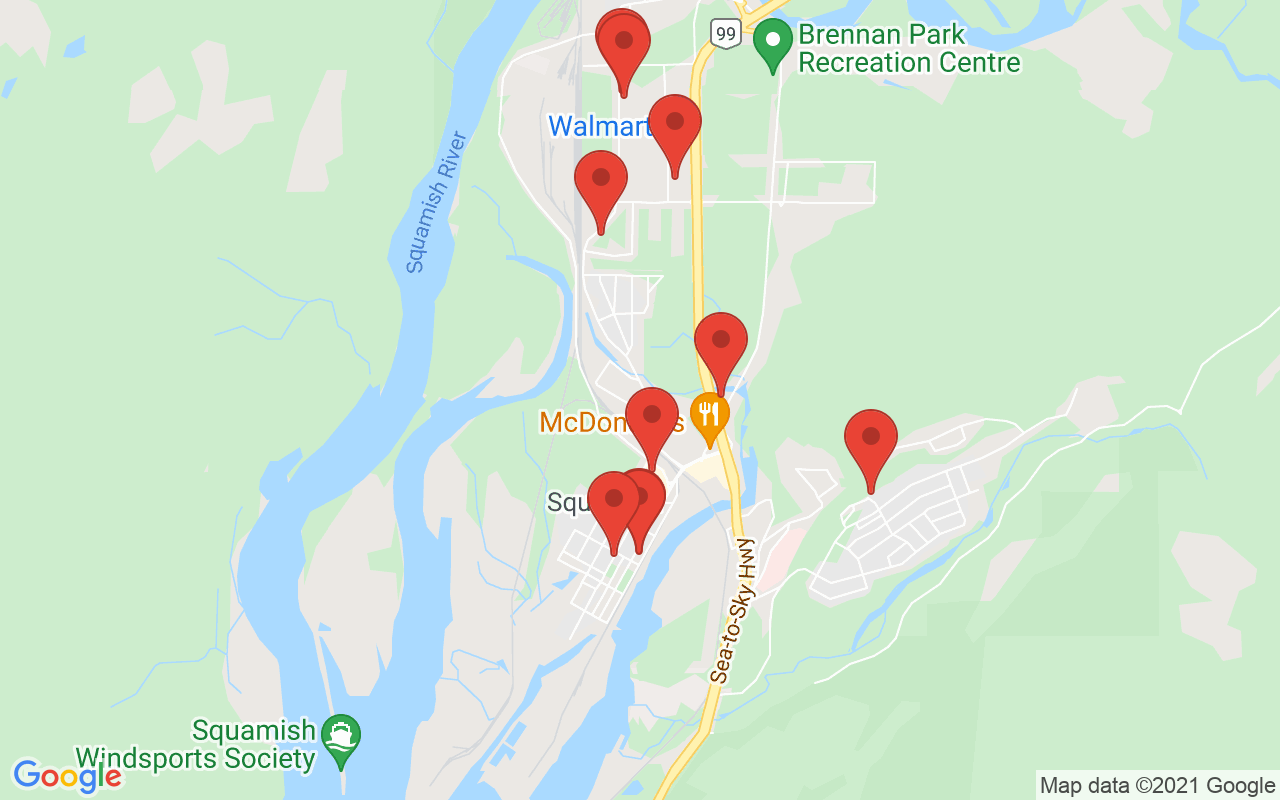

In [213]:
# single map in this cell. See cell below for multiple maps

# Set lat and long for center of map
latitude = '49.7073'
longitude = '-123.15286'


polyline = direction_poly[0][4]
markers = ''
for coords in top_ten_yelp['lat_lon']:
    markers += coords
    markers += "|"
    
print(markers)
# Request
url = "https://maps.googleapis.com/maps/api/staticmap" 
options = {'center': str(latitude) + ',' + str(longitude), 
          'zoom': 13,
          'size': '640x400',
           'scale': 2, 
          'maptype':'roadmap', # roadmap, satellite, terrain, hybrid
           #'path': f'enc:{polyline}', 
           'markers': markers,
           'key': cfg.GOOGLE_API_KEY
          } 
response = re.get(url, params=options)
image = Image.open(re.get(url, params=options, stream=True).raw)

image

In [211]:
# Save image
def save_img(name, image):
    filename = f'{name}.png'
    save_folder = '/media/sf_shared_with_VM/'
    save_path = os.path.join(save_folder, filename)
    image.save(save_path)
    
save_img('yelp_top_ten_markers',image)

In [183]:
#mulitiple maps for each leg of route


# Request
def get_map(polyline):
    url = "https://maps.googleapis.com/maps/api/staticmap" 
    options = {'center': '49.7073' + ',' + '-123.15286', 
              'zoom': 13,
              'size': '640x400',
               'scale': 2, 
              'maptype':'roadmap', # roadmap, satellite, terrain, hybrid
               'path': f'enc:{polyline}', 
               'key': cfg.GOOGLE_API_KEY
              } 
    response = re.get(url, params=options)
    image = Image.open(re.get(url, params=options, stream=True).raw)
    #print(response.url)
    return image

def save_img(name, image):
    filename = f'z13-{name}.png'
    save_folder = '/media/sf_shared_with_VM/'
    save_path = os.path.join(save_folder, filename)
    image.save(save_path)
    
#save_img(i,get_map(direction_poly[0][4]))
for i,x in enumerate(route_list[0]):
    if i < len(route_list[0])-1:
        #print(direction_poly[x][route_list[0][i+1]])
        print(i)
        save_img(i,get_map(direction_poly[x][route_list[0][i+1]]))



0
1
2
3
4
5
6
7
8
9


#### Google Places

### Step 2: put data into SQLite db

### Step 3: Compare the data from the differnt APIs